<a href="https://colab.research.google.com/github/soumyansalian/test/blob/main/Day_2_Hugging_Face_and_Gradio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

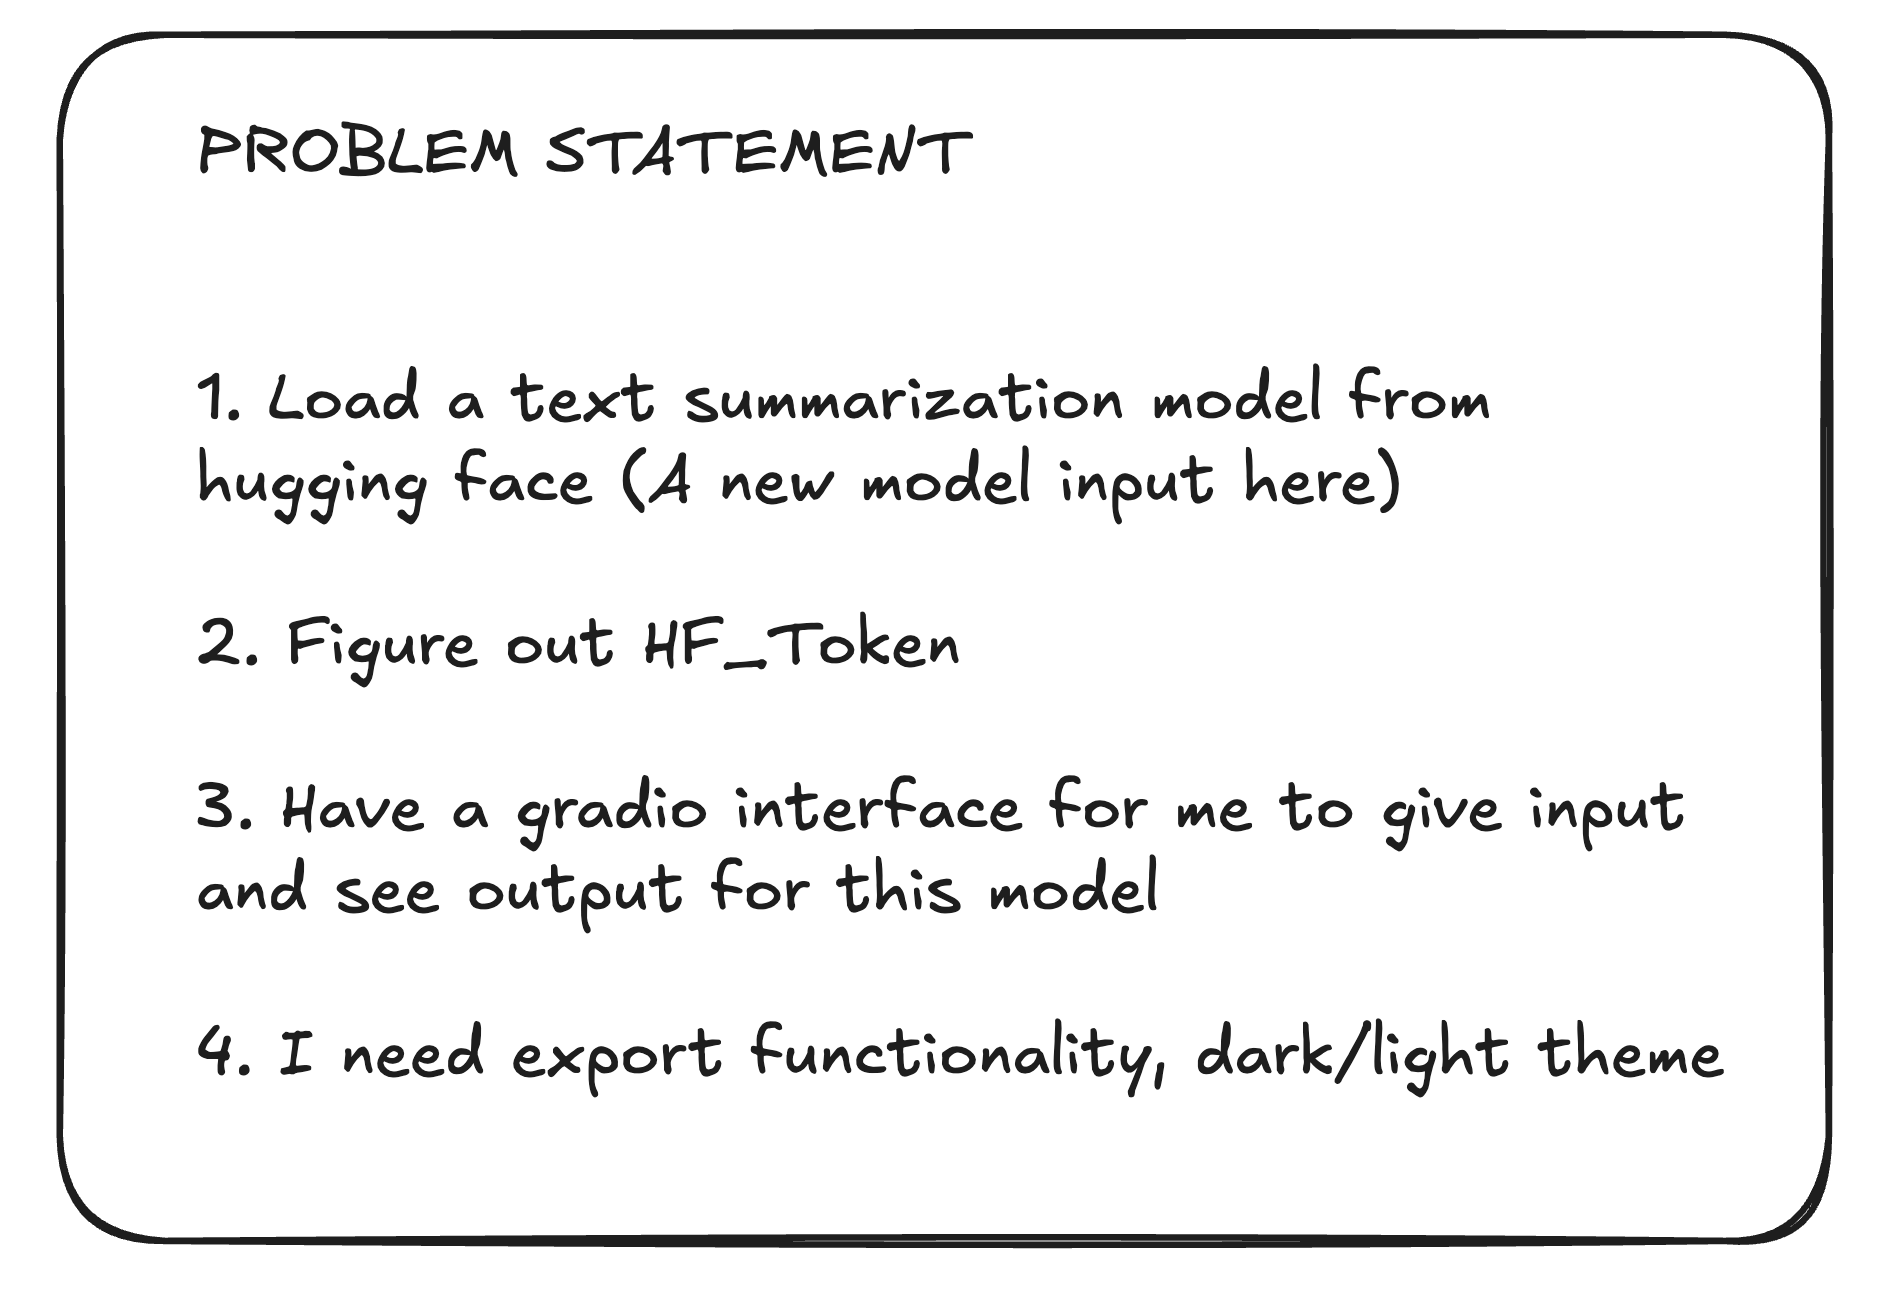

PROBLEM STATEMENT

ASSIGNMENT GOES BELOW

In [ ]:
# Assignment Code here
#!pip install gradio transformers torch

import gradio as gr
from transformers import pipeline
import os

# Load the summarization model
print("Loading model...")
summarizer = pipeline("summarization", model="Falconsai/text_summarization", device=-1)
print("Model loaded successfully!")

def summarize_text(text, max_length, min_length):
    """
    Summarize the input text
    """
    if not text or text.strip() == "":
        return "Please enter some text to summarize."

    try:
        # Generate summary
        summary = summarizer(
            text,
            max_length=int(max_length),
            min_length=int(min_length),
            do_sample=False
        )
        return summary[0]['summary_text']
    except Exception as e:
        return f"Error during summarization: {str(e)}"

def export_summary(input_text, summary_text):
    """
    Export the input and summary to a text file
    """
    content = f"SUMMARY:\n{'-'*50}\n{summary_text}\n\n\n\n"
    content += f"ORIGINAL TEXT:\n{'-'*50}\n{input_text}\n"

    # Save to file
    file_path = "/content/summary.txt"
    with open(file_path , "w", encoding="utf-8") as f:
        f.write(content)

    return file_path

# Custom CSS for better styling
custom_css = """
.gradio-container {
    font-family: 'Arial', sans-serif;
}
.output-text {
    font-size: 16px;
    line-height: 1.6;
}
"""

# Create Gradio interface
with gr.Blocks(css=custom_css, theme=gr.themes.Default()) as demo:
    gr.Markdown(
        """
        # 📝 Text Summarization for Short AI News Updates
        This application generates concise summaries of long text.
        Enter your text below and click 'Summarize' to get started!
        """
    )

    with gr.Row():
        with gr.Column():
            input_text = gr.Textbox(
                label="Input Text",
                placeholder="Paste your text here...",
                lines=10,
                max_lines=20
            )

            with gr.Row():
                max_length_slider = gr.Slider(
                    minimum=30,
                    maximum=300,
                    value=130,
                    step=10,
                    label="Maximum Summary Length"
                )
                min_length_slider = gr.Slider(
                    minimum=10,
                    maximum=100,
                    value=30,
                    step=5,
                    label="Minimum Summary Length"
                )

            summarize_btn = gr.Button("Summarize", variant="primary", size="lg")

        with gr.Column():
            output_text = gr.Textbox(
                label="Summary",
                lines=10,
                max_lines=20,
                elem_classes="output-text"
            )

            with gr.Row():
                export_btn = gr.Button("📥 Export Summary", size="sm")
                export_file = gr.File(label="Download", visible=False)

            gr.Markdown(
                """
                ### Tips:
                - For best results, input text should be at least 100 words
                - Adjust the length sliders to control summary size
                - The model works best with news articles, blog posts, and formal text
                """
            )

    # Example inputs
    gr.Examples(
        examples=[
            [
                "Over the past year, OpenAI introduced GPT-4o, o1, and o3, each improving how AI thinks, reasons, and interacts.\n\n"
                "These models made AI responses faster, more accurate, and more intuitive. But each was just a step toward something bigger.\n\n"
                "On August 6th, OpenAI announced — not-so-subtly — the imminent launch of GPT-5.\n\n"
                "And now, as of August 7, 2025, GPT-5 has officially arrived, bringing together OpenAI’s most advanced reasoning and multimodal capabilities in one unified model. GPT-5 is now the default model in ChatGPT for all free and paid users, replacing GPT-4o entirely.\n\n"
                "In this guide, I’ll break down everything confirmed about GPT-5: its capabilities, performance upgrades, training process, release timeline, and cost.\n\n"
                "Build GPT Chatbots\n"
                "Build custom AI agents powered by LLMs\n"
                "Start now\n"
                "What is GPT-5?\n"
                "GPT-5 is OpenAI’s latest-generation large language model, officially released on August 7, 2025. It builds on the GPT architecture while integrating advancements from reasoning-first models like o1 and o3.\n\n"
                "Before GPT-5, OpenAI rolled out GPT-4.5 '(Orion)' inside ChatGPT — a transitional model that sharpened reasoning accuracy, reduced hallucinations, and laid the groundwork for the deeper chain-of-thought execution now native to GPT-5.\n\n"
                "Many of the capabilities hinted in the past — such as stepwise logic, better context retention, and smoother multimodal switching — are now fully realized and unified in GPT-5.\n\n"
                "GPT-5 variants, GPT-5 nano and GPT-5 mini\n"
                "GPT-5 and It's variants\n"
                "GPT-5 runs as part of a unified adaptive system. A new real-time router automatically chooses between a fast, high-throughput model for routine queries and a thinking model for complex reasoning, eliminating the need to manually switch between specialized models.\n\n"
                "What are the different GPT-5 models?\n"
                "GPT-5 is a series of models — a family of specialized variants optimized for different use cases, ranging from applications of ChatGPT to large-scale deployments via the API.\n\n"
                "Each GPT-5 variant runs on the same unified architecture but is tuned for a specific balance of knowledge cut-off, reasoning depth, speed, and operational scale.\n\n"
                "Variant        Purpose & Highlights    Context Window tokens   Knowledge Cutoff\n"
                "gpt-5  Best for deep reasoning and complex workflows   400,000 Sep 30, 2024\n"
                "gpt-5-mini     Faster, lower-cost option with solid reasoning  400,000 May 30, 2024\n"
                "gpt-5-nano     Ultra-fast for real-time and embedded uses      400,000 May 30, 2024\n"
                "GPT-5 Model Variants and Specifications\n\n"
                "These variants unify OpenAI’s reasoning-first direction with targeted performance tuning, giving developers the flexibility to match model choice to workload complexity and deployment scale.\n\n"
                "How does GPT-5 perform?\n"
                "With GPT-5 officially released on August 7, 2025, we’re now seeing how its architecture handles real-world use across reasoning, multimodality, and agent-style task execution.\n\n"
                "Sam Altman had previously hinted that GPT-5 would move beyond just being a better chatbot — and based on early usage, that’s exactly what it delivers.\n\n"
                "Reasoning that adapts in real time\n"
                "A built-in routing system decides when to answer instantly and when to think in steps. For complex queries, GPT-5 moves into a chain-of-thought process with embedded prompt-chaining, mapping out intermediate steps before giving a final answer.\n\n"
                "This makes GPT chatbots built on GPT-5 better at sustained problem-solving — from multi-stage code debugging to layered business analysis — without requiring separate models or mode switching.\n\n"
                "Context handling at scale\n"
                "In ChatGPT, the model can hold around 256,000 tokens in memory; through the API, that expands to 400,000. This enables work across entire books, multi-hour meeting transcripts, or large repositories without losing track of earlier details.\n\n"
                "Across long sessions, how accurate ChatGPT responses are has noticeably improved, with fewer contradictions and stronger retention of earlier context.\n\n"
                "Better language support for global market\n"
                "GPT-5’s unified architecture brings a major leap in multilingual and voice capabilities. ChatGPT can now handle a wider ChatGPT support for languages with higher translation accuracy and fewer context drops across extended conversations.\n\n"
                "These gains extend to voice interactions. Responses sound more natural across accents and speech patterns, making multilingual GPT chatbots just as fluid in spoken Spanish, Hindi, Japanese, or Arabic as they are in text.\n\n"
                "From Chatbot to AI Agent\n"
                "With GPT-5, OpenAI has expanded its approach to application connectors — native integrations that let the model interact directly with external tools, CRMs, databases, and productivity suites.\n\n"
                "By routing tasks to lightweight connectors instead of pushing every step through high-cost reasoning calls, teams can reduce API spend while still keeping complex logic available when it is needed.\n\n"
                "How much does GPT-5 cost?\n"
                "GPT-5 is available through ChatGPT subscriptions and the OpenAI API, with pricing that varies by variant. For API users, GPT-5 is offered in several variants — gpt-5, gpt-5-mini, and gpt-5-nano — priced per million input and output tokens.\n\n"
                "OpenAI API token costs per 1M tokens input vs output\n"
                "Model  Input / 1M tokens       Output / 1M tokens\n"
                "gpt-5  $1.25   $10.00\n"
                "gpt-5-mini     $0.05   $0.40\n"
                "gpt-5-nano     $0.25   $2.00\n"
                "gpt-4o $2.50   $10.00\n"
                "gpt-o3 $3.00   $12.00\n"
                "gpt-o3-pro     $20.00  $80.00\n\n"
                "Apart from API pricing, OpenAI has confirmed that GPT-5 is available across multiple ChatGPT tiers, making it accessible to free users while unlocking advanced capabilities for paid plans:\n\n"
                "Free Tier – GPT-5 with standard reasoning capabilities and daily usage limits.\n\n"
                "Plus Tier – Increased usage limits and improved reasoning performance.\n\n"
                "Pro Tier – Access to GPT-5 Pro, the high-reasoning “thinking” variant with extended context windows, faster routing, and priority access to advanced tools.\n\n"
                "OpenAI’s pricing model allows developers to choose between maximum reasoning depth, faster latency, or cost efficiency depending on their needs.",
                130,
                30
          ]
        ],
        inputs=[input_text, max_length_slider, min_length_slider],
    )


    # Event handlers
    summarize_btn.click(
        fn=summarize_text,
        inputs=[input_text, max_length_slider, min_length_slider],
        outputs=output_text
    )

    def export_and_show(input_txt, output_txt):
        #if not input_txt == "":
          file_path = export_summary(input_txt, output_txt)
          return gr.File(value=file_path, visible=True)

    export_btn.click(
        fn=export_and_show,
        inputs=[input_text, output_text],
        outputs=export_file
    )


# Launch the interface
if __name__ == "__main__":
    demo.launch(
        share=True,
        debug=True,
        show_error=True
    )